https://data-science-blog.com/blog/2022/04/11/how-to-choose-the-best-pre-trained-model-for-your-convolutional-neural-network/
https://www.analyticsvidhya.com/blog/2020/08/top-4-pre-trained-models-for-image-classification-with-python-code/

![test](data\train\Dominik\augmented_image_0.jpg)

In [2]:
%pip install fast_ml

  Using cached fast_ml-3.68-py3-none-any.whl (42 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install -U efficientnet


  Using cached efficientnet-1.1.1-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
# import the necessary packages
import os
import zipfile
# import matplotlib as plt
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import glob

# from pyimagesearch.resnet import ResNet
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import layers, Model
from tensorflow.keras.layers import Dropout, Flatten, Dense
#from keras import optimizers
from tensorflow.keras import optimizers

from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array, array_to_img
from matplotlib import pyplot
import efficientnet.keras as efn

from tensorflow.keras.applications.vgg16 import VGG16

import matplotlib.pyplot as plt
import numpy as np
import glob
import zipfile
import numpy as np
from keras.preprocessing import image
import glob, random
import pandas as pd
from sklearn.model_selection import train_test_split


In [2]:
# https://qmul-tinyface.github.io/
# selet 500 random images from the tinyface Dataset
# from that dataset get the Gallery_Match folder from the Testing_set because its the samllest folder
# C:\Users\domin\Documents\Studium\Master\Deep-Learning\Projekt\tinyface\Testing_Set\Gallery_Match


random_image_path =[]
random_resized = []
#file_path_type = [r"C:\Users\Dominik\Documents\Studium\Master\Deep-Learning\tinyface\Testing_Set\Gallery_Match/*.jpg"]
file_path_type = [r"C:\Users\Dominik\Documents\Studium\Master\Deep-Learning\random_bilder/*.jpg"]


for i in range(150):
    images = glob.glob(random.choice(file_path_type))
    random_image_path.append(random.choice(images))

for i in range(len(random_image_path)): #assuming gif
    random_images = image.load_img(random_image_path[i])
    random_resized.append(random_images.resize([224,224]))
    #random_resized.save(r'data\dataset\unknown\random_image_' +str(i) +'.jpg', 'JPEG')


In [3]:
image_path =[]
dominik_resized = []
#file_path_type = [r"C:\Users\domin\Documents\Studium\Master\Deep-Learning\Projekt\Datensatz\Dominik/*.jpeg"]
file_path_type = [r"C:\Users\Dominik\Documents\Studium\Master\Deep-Learning\Datensatz/*.jpeg"]

for i in range(380):
    images = glob.glob(random.choice(file_path_type))
    image_path.append(random.choice(images))

for i in range(len(image_path)): #assuming gif
    dominik_images = image.load_img(image_path[i])
    dominik_resized.append(dominik_images.resize([224,224]))

    #dominik_resized[i].save(r'data\dataset\Dominik\image_' +str(i) +'.jpg', 'JPEG')


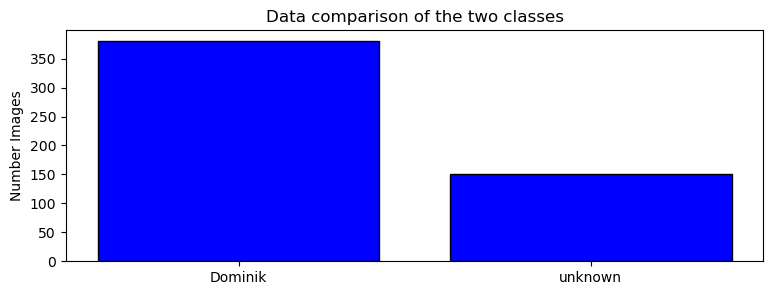

In [4]:
names = ['Dominik', 'unknown']
values = [len(dominik_resized), len(random_resized)]

plt.figure(figsize=(9, 3))
plt.bar(names, values, color='blue',edgecolor='black')
plt.ylabel('Number Images')
plt.title('Data comparison of the two classes')
plt.show()

In [5]:
# Let's say we want to split the data in 80:10:10 for train:valid:test dataset
y_unknown = []
for i in range(len(random_resized)):
    y_unknown.append('unknown')

y_dominik = []
for i in range(len(dominik_resized)):
    y_dominik.append('Dominik')

# In the first step we will split the data in training and remaining dataset
X_train_unknown, X_rem_unknown, y_train_unknown, y_rem_unknown = train_test_split(random_resized,y_unknown, train_size=0.7)
X_train_dominik, X_rem_dominik, y_train_dominik, y_rem_dominik = train_test_split(dominik_resized,y_dominik, train_size=0.7)

# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
X_valid_unknown, X_test_unknown, y_valid_unknown, y_test_unknown = train_test_split(X_rem_unknown,y_rem_unknown, test_size=0.5)
X_valid_dominik, X_test_dominik, y_valid__dominik, y_test__dominik = train_test_split(X_rem_dominik,y_rem_dominik, test_size=0.5)

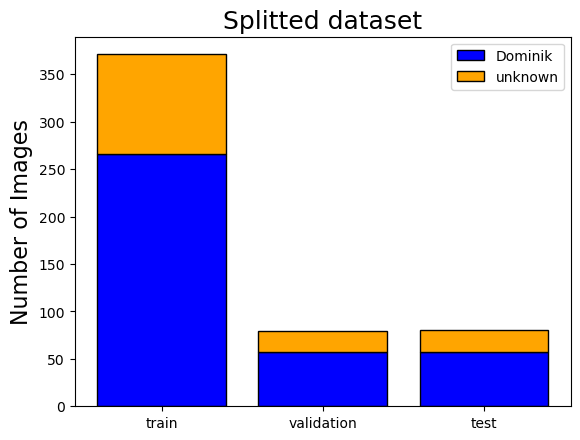

In [6]:
split=['train', 'validation', 'test']
data_origin=['Dominik','unknown']
pos = np.arange(len(split))
vales_dominik = [len(X_train_dominik), len(X_valid_dominik), len(X_test_dominik)]
values_unknown = [len(X_train_unknown), len(X_valid_unknown), len(X_test_unknown)]

plt.bar(pos,vales_dominik,color='blue',edgecolor='black')
plt.bar(pos,values_unknown,color='orange',edgecolor='black',bottom=vales_dominik)
plt.xticks(pos, split)
plt.ylabel('Number of Images', fontsize=16)
plt.title('Splitted dataset',fontsize=18)
plt.legend(data_origin)
plt.show()

In [65]:
for i in range(len(X_train_unknown)):
    X_train_unknown[i].save(r'data\train\unknown\image_' +str(i) +'.jpg', 'JPEG')
    # filename = r'data\train\unknown\image_' +str(i) +'.jpg'
    # cv2.imwrite(filename, X_train_unknown[i])
for i in range(len(X_valid_unknown)):
    X_valid_unknown[i].save(r'data\validation\unknown\image_' +str(i) +'.jpg', 'JPEG')
    # filename = r'data\validation\unknown\image_' +str(i) +'.jpg'
    # cv2.imwrite(filename, X_valid_unknown[i])
for i in range(len(X_test_unknown)):
    X_test_unknown[i].save(r'data\test\unknown\image_' +str(i) +'.jpg', 'JPEG')
    # filename = r'data\test\unknown\image_' +str(i) +'.jpg'
    # cv2.imwrite(filename, X_test_unknown[i])

In [51]:
for i in range(len(X_train_dominik)):
    X_train_dominik[i].save(r'data\train\Dominik\image_' +str(i) +'.jpg', 'JPEG')
    # filename = r'data\train\Dominik\image_' +str(i) +'.jpg'
    # cv2.imwrite(filename, X_train_dominik[i])
for i in range(len(X_valid_dominik)):
    X_valid_dominik[i].save(r'data\validation\Dominik\image_' +str(i) +'.jpg', 'JPEG')
    # filename = r'data\validation\Dominik\image_' +str(i) +'.jpg'
    # cv2.imwrite(filename, X_valid_dominik[i])
for i in range(len(X_test_dominik)):
    X_test_dominik[i].save(r'data\test\Dominik\image_' +str(i) +'.jpg', 'JPEG')
    # filename = r'data\test\Dominik\image_' +str(i) +'.jpg'
    # cv2.imwrite(filename, X_test_dominik[i])

In [7]:
# X_train_unknown
# X_valid_unknown
# X_train_dominik
# X_valid__dominik
train_unknown_array = []
for i in range(len(X_train_unknown)):
    train_unknown_array.append(np.expand_dims(img_to_array(X_train_unknown[i]),axis=0))

valid_unknown_array = []
for i in range(len(X_valid_unknown)):
    valid_unknown_array.append(np.expand_dims(img_to_array(X_valid_unknown[i]), axis=0))

train_dominik_array = []
for i in range(len(X_train_dominik)):
    train_dominik_array.append(np.expand_dims(img_to_array(X_train_dominik[i]), axis=0))

valid_dominik_array = []
for i in range(len(X_valid_dominik)):
    valid_dominik_array.append(np.expand_dims(img_to_array(X_valid_dominik[i]), axis=0))



In [8]:
train_unknown_datagen = ImageDataGenerator(width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True ,rotation_range=30, brightness_range=[0.4,1.2], zoom_range=[0.6,1.0], fill_mode='reflect')
validation_unknown_datagen = ImageDataGenerator(width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True ,rotation_range=30, brightness_range=[0.4,1.2], zoom_range=[0.6,1.0], fill_mode='reflect')
train_dominik_datagen = ImageDataGenerator(width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True ,rotation_range=30, brightness_range=[0.4,1.2], zoom_range=[0.6,1.0], fill_mode='reflect')
validation_dominik_datagen = ImageDataGenerator(width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True ,rotation_range=30, brightness_range=[0.4,1.2], zoom_range=[0.6,1.0], fill_mode='reflect')


for i in range(len(train_unknown_array)):
    train_generator_unknown = train_unknown_datagen.flow(train_unknown_array[i], batch_size = 1)
    # generate batch of images
    batch = train_generator_unknown.next()
    im = array_to_img(batch[0], scale=False)
    #im.save(r'data\train\unknown\augmented_image_'+ str(i)+ '.jpg')

for i in range(len(valid_unknown_array)):
    valid_generator_unknown = validation_unknown_datagen.flow(valid_unknown_array[i], batch_size = 1)
    # generate batch of images
    batch = valid_generator_unknown.next()
    im = array_to_img(batch[0], scale=False)
    #im.save(r'data\validation\unknown\augmented_image_'+ str(i)+ '.jpg')

for i in range(len(train_dominik_array)):
    train_generator_dominik = train_dominik_datagen.flow(train_dominik_array[i], batch_size = 1)
    # generate batch of images
    batch = train_generator_dominik.next()
    im = array_to_img(batch[0], scale=False)
    #im.save(r'data\train\Dominik\augmented_image_'+ str(i)+ '.jpg')

for i in range(len(valid_dominik_array)):
    valid_generator_dominik = validation_dominik_datagen.flow(valid_dominik_array[i], batch_size = 1)
    # generate batch of images
    batch = valid_generator_dominik.next()
    im = array_to_img(batch[0], scale=False)
    #im.save(r'data\validation\Dominik\augmented_image_'+ str(i)+ '.jpg')


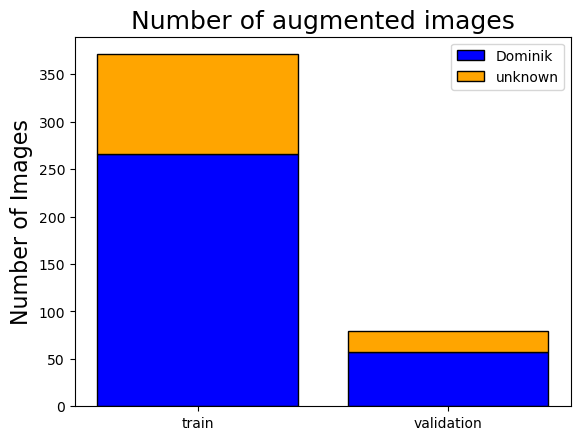

In [9]:
split=['train', 'validation']
data_origin=['Dominik','unknown']
pos = np.arange(len(split))
vales_train = [len(train_dominik_array), len(valid_dominik_array)]
values_valid = [len(train_unknown_array), len(valid_unknown_array)]

plt.bar(pos,vales_train,color='blue',edgecolor='black')
plt.bar(pos,values_valid,color='orange',edgecolor='black',bottom=vales_train)
plt.xticks(pos, split)
plt.ylabel('Number of Images', fontsize=16)
plt.title('Number of augmented images',fontsize=18)
plt.legend(data_origin)
plt.show()

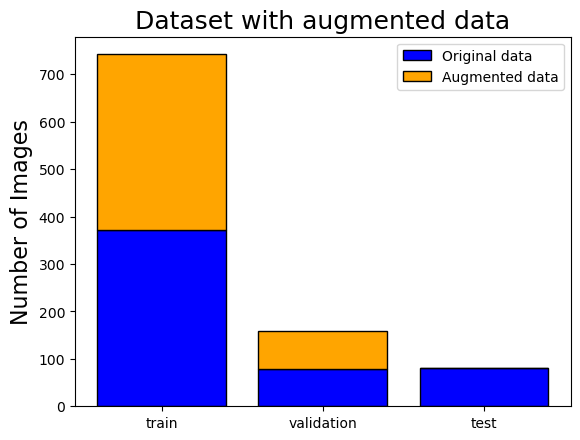

In [10]:
split=['train', 'validation', 'test']
data_origin=['Original data','Augmented data']
pos = np.arange(len(split))
vales_og = [len(train_dominik_array+train_unknown_array), len(valid_dominik_array+valid_unknown_array), len(X_test_unknown+X_test_dominik)]
values_augmented = [len(train_dominik_array+train_unknown_array), len(valid_dominik_array+valid_unknown_array), 0]

plt.bar(pos,vales_og,color='blue',edgecolor='black')
plt.bar(pos,values_augmented,color='orange',edgecolor='black',bottom=vales_og)
plt.xticks(pos, split)
plt.ylabel('Number of Images', fontsize=16)
plt.title('Dataset with augmented data',fontsize=18)
plt.legend(data_origin)
plt.show()

In [126]:
#load dominik images
images_dominik = []
for filename in glob.glob("dataset/Dominik/" + "*.jpg"): #assuming gif
    im=image.load_img(filename)
   
    #array_list_train.append(img_to_array(im))
    images_dominik.append(np.expand_dims(img_to_array(im), axis=0))
print("list: ", len(images_dominik))


#load unknown images
images_unknown = []
for filename in glob.glob("data/validation/Dominik/" + "*.jpg"): #assuming gif
    im=image.load_img(filename)
    
    #array_list_val.append(img_to_array(im))
    images_unknown.append(np.expand_dims(img_to_array(im), axis=0))
print("list: ", len(images_unknown))

list:  0
list:  30


In [13]:
################ Unzip the dataset in the Colab runtime #################

#zip_file_path = "C:/Users/Dominik/Documents/Studium/Master/Deep-Learning/Datensatz.zip"
zip_file_path = r'C:\Users\domin\Documents\Studium\Master\Deep-Learning\Projekt\Datensatz.zip'
pathToZip = os.path.join(zip_file_path)

print("unzipping {}".format(pathToZip))

pathToData = "/tmp/Datensatz"
with zipfile.ZipFile(pathToZip, 'r') as zip_ref:
    zip_ref.extractall(pathToData)

# training images
data    = glob.glob(os.path.join(pathToData, "Datensatz/" + "*.jpeg"))
# test images
#test    = glob.glob(os.path.join(pathToData, "Datensatz/test/" + "*.jpg"))

print(pathToData + "/Datensatz/") #/train
print("train    : {} image paths".format(len(data)))
#print("train    : {} image paths".format(len(test)))


unzipping C:\Users\domin\Documents\Studium\Master\Deep-Learning\Projekt\Datensatz.zip
/tmp/Datensatz/Datensatz/
train    : 535 image paths


In [ ]:
from PIL import Image
import glob
image_list = []
for filename in glob.glob("/tmp/Datensatz/Datensatz/" + "*.jpeg"): #assuming gif
    im=Image.open(filename)
    
    image_list.append(im)

print("list: ", len(image_list))
print(image_list[0])


https://qmul-tinyface.github.io/

In [5]:

samples = []
for i in range(len(image_list)):
        temp_data = img_to_array(image_list[i])
        # normalize image
        # print("data: ", data)
        # normalize image
        img_norm = cv2.normalize(temp_data, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
        
        # print("norm: ", img_norm)
        # expand dimension to one sample
        # samples.append(expand_dims(img_norm, 0))
        samples.append(array_to_img(img_norm))
       


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Let's say we want to split the data in 80:10:10 for train:valid:test dataset
train_size=0.8
y = []
samples = image_list
for i in range(len(samples)):
    y.append('Dominik')


# In the first step we will split the data in training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(samples,y, train_size=0.7)

# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)


In [16]:
X_train_resized = []
X_val_resized = []

for i in range(len(X_train)):
    X_train_resized.append(X_train[i].resize([224,224]))

for i in range(len(X_valid)):
    X_val_resized.append(X_valid[i].resize([224,224]))

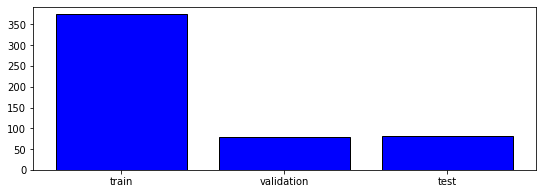

In [17]:
names = ['train', 'validation', 'test']
values = [len(X_train), len(X_valid), len(X_test)]

plt.figure(figsize=(9, 3))
plt.bar(names, values, color='blue',edgecolor='black')
plt.show()

In [18]:
for i in range(len(X_train)):
    X_train_resized[i].save(r'data\train\Dominik\image_' +str(i) +'.jpg', 'JPEG')

    
for i in range(len(X_valid)):
    X_val_resized[i].save(r'data\validation\Dominik\image_' +str(i) +'.jpg', 'JPEG')

for i in range(len(X_test)):
    X_test[i].save(r'data\test\Dominik\image_' +str(i) +'.jpg', 'JPEG')
    

In [69]:
train_datagen = ImageDataGenerator(width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True ,rotation_range=30, brightness_range=[0.4,1.2], zoom_range=[0.6,1.0], fill_mode='reflect')
validation_datagen = ImageDataGenerator(width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True ,rotation_range=30, brightness_range=[0.4,1.2], zoom_range=[0.6,1.0], fill_mode='reflect')

path_train = "data/train/"
train_generator = train_datagen.flow_from_directory(path_train, batch_size = 1, target_size = (224, 224))
_, _, files_train = next(os.walk("data/train/Dominik"))
number_augmented_train = len(files_train)*3

for i in range(len(files_train)*3):
    # generate batch of images
    batch = train_generator.next()
    squeeze_array = np.squeeze(batch[0], axis=(0))
    im = array_to_img(squeeze_array, scale=False)
    im.save(r'data\train\Dominik\augmented_image_'+ str(i)+ '.jpg')



path_validation = "data/validation/"
validation_generator = validation_datagen.flow_from_directory(path_validation, batch_size = 1, target_size = (224, 224))
_, _, files_validation = next(os.walk("data/validation/Dominik"))
number_augmented_validation = len(files_validation)*2

for i in range(len(files_validation)*2):
    # generate batch of images
    batch = train_generator.next()
    squeeze_array = np.squeeze(batch[0], axis=(0))
    im = array_to_img(squeeze_array, scale=False)
    im.save(r'data\validation\Dominik\augmented_image_'+ str(i)+ '.jpg')



Found 376 images belonging to 2 classes.
Found 81 images belonging to 2 classes.


In [66]:
# Step 2: Loading the Base Model
base_model = efn.EfficientNetB0(input_shape = (224, 224, 3), include_top = False, weights = 'imagenet')

In [67]:
# Again, let us freeze the layers:
for layer in base_model.layers:
    layer.trainable = False

In [68]:
# Step 3: Build the model

x = base_model.output
y = base_model.input
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.5)(x)

# Add a final sigmoid layer with 1 node for classification output
predictions = Dense(1, activation="sigmoid")(x)
model_final = Model(y, predictions) #base_model.input

In [69]:
# Step 4: Compile and Fit

model_final.compile(optimizers.RMSprop(lr=0.0001, decay=1e-6),loss='binary_crossentropy',metrics=['accuracy'])

In [58]:


train_arr = []
for filename in glob.glob("data/train/Dominik/" + "*.jpg"): #assuming gif
    im=image.load_img(filename)
   
    #array_list_train.append(img_to_array(im))
    train_arr.append(np.expand_dims(img_to_array(im), axis=0))
print("list: ", len(train_arr))




val_arr = []
for filename in glob.glob("data/validation/Dominik/" + "*.jpg"): #assuming gif
    im=image.load_img(filename)
    
    #array_list_val.append(img_to_array(im))
    val_arr.append(np.expand_dims(img_to_array(im), axis=0))
print("list: ", len(val_arr))
print(val_arr[0].shape)


list:  1496
list:  240
(1, 224, 224, 3)


In [70]:
train_dir = "data/train/"
train_datagen = ImageDataGenerator()
train_generator = train_datagen.flow_from_directory(train_dir, batch_size = 20, class_mode = 'binary', target_size = (224, 224))

val_dir = "data/validation/"
val_datagen = ImageDataGenerator()
val_generator = val_datagen.flow_from_directory(val_dir, batch_size = 20, class_mode = 'binary', target_size = (224, 224))


Found 371 images belonging to 2 classes.
Found 79 images belonging to 2 classes.


In [73]:
eff_history = model_final.fit(train_generator, validation_data = val_generator, steps_per_epoch = 10, epochs = 10)

Epoch 1/10
10/10 [==============================] - 5s 539ms/step - loss: 352.5640 - accuracy: 0.7550 - val_loss: 497.5800 - val_accuracy: 0.7215
Epoch 2/10
10/10 [==============================] - 5s 535ms/step - loss: 256.9001 - accuracy: 0.7749 - val_loss: 284.9403 - val_accuracy: 0.6076
Epoch 3/10
10/10 [==============================] - 5s 546ms/step - loss: 347.5471 - accuracy: 0.7850 - val_loss: 199.1569 - val_accuracy: 0.7595
Epoch 4/10
10/10 [==============================] - 5s 550ms/step - loss: 238.0468 - accuracy: 0.7600 - val_loss: 276.7761 - val_accuracy: 0.7468
Epoch 5/10
10/10 [==============================] - 5s 528ms/step - loss: 359.3312 - accuracy: 0.7435 - val_loss: 155.6008 - val_accuracy: 0.8481
Epoch 6/10
10/10 [==============================] - 5s 540ms/step - loss: 150.7573 - accuracy: 0.7900 - val_loss: 244.3648 - val_accuracy: 0.7975
Epoch 7/10
10/10 [==============================] - 5s 533ms/step - loss: 134.1217 - accuracy: 0.8639 - val_loss: 178.4119 -

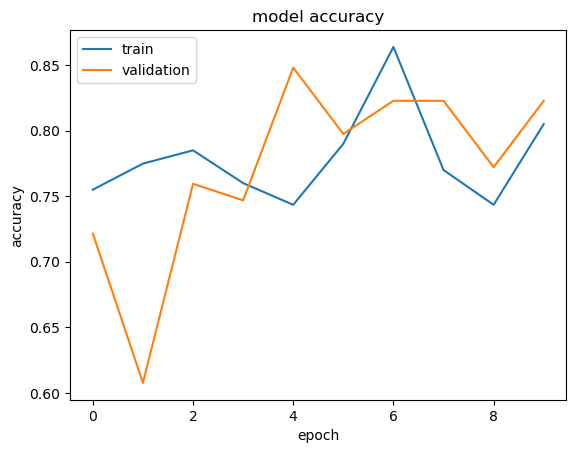

In [74]:
def plot_hist(eff_history):
    plt.plot(eff_history.history["accuracy"])
    plt.plot(eff_history.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()


plot_hist(eff_history)

In [ ]:
# predicting images
img = image.load_img(r'data\test\unknown\image_60.jpg', target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model_final.predict(images, batch_size=10)
print(classes)

[[0.08831871]]


In [75]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from keras.models import Sequential

In [76]:
training_batch_size=32
height,width=240,240

In [77]:
train_data = "data/train"
valid_data = "data/validation"

In [90]:
train_set = tf.keras.preprocessing.image_dataset_from_directory(
train_data,
validation_split=0.1,
subset="training",
seed=123,
image_size=(height,width),
batch_size=training_batch_size)

Found 371 files belonging to 2 classes.
Using 334 files for training.


In [89]:
validation_set = tf.keras.preprocessing.image_dataset_from_directory(
valid_data,
validation_split=0.9,
subset="validation",
seed=123,
image_size=(height, width),
batch_size=training_batch_size)

Found 79 files belonging to 2 classes.
Using 71 files for validation.


In [80]:
image_name_train = train_set.class_names
print(image_name_train)
image_name_valid = validation_set.class_names
print(image_name_valid)

['Dominik', 'unknown']
['Dominik', 'unknown']


In [81]:
dnn_model = Sequential()

In [82]:
imported_model= tf.keras.applications.ResNet50(include_top=False,
input_shape=(240,240,3),
pooling='avg',classes=2,
weights='imagenet')
for layer in imported_model.layers:
    layer.trainable=False

In [83]:
dnn_model.add(imported_model)
dnn_model.add(Flatten())
dnn_model.add(Dense(512, activation='relu'))
dnn_model.add(Dense(5, activation='softmax'))

In [84]:
dnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               1049088   
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 2565      
Total params: 24,639,365
Trainable params: 1,051,653
Non-trainable params: 23,587,712
_________________________________________________________________


In [85]:
from tensorflow.keras.optimizers import Adam
dnn_model.compile(optimizer=Adam(lr=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [9]:
train_set = []
for img in glob.glob("data/train/Dominik/*.jpg"):
    im = image.load_img(img, target_size=(224, 224))
    x = image.img_to_array(im)
    train_set.append(image.img_to_array(im))
    #train_set.append(np.expand_dims(x, axis=0))

for img in glob.glob("data/train/unknown/*.jpg"):
    im = image.load_img(img, target_size=(224, 224))
    x = image.img_to_array(im)
    train_set.append(image.img_to_array(im))
    #train_set.append(np.expand_dims(x, axis=0))

    
    

valid_set = []
for img in glob.glob("data/validation/Dominik/*.jpg"):
    im = image.load_img(img, target_size=(224, 224))
    x = image.img_to_array(im)
    valid_set.append(image.img_to_array(im))
    #valid_set.append(np.expand_dims(x, axis=0))

for img in glob.glob("data/validation/unknown/*.jpg"):
    im = image.load_img(img, target_size=(224, 224))
    x = image.img_to_array(im)
    valid_set.append(image.img_to_array(im))
    #valid_set.append(np.expand_dims(x, axis=0))


In [91]:
history = dnn_model.fit(
train_set,
validation_data=validation_set,
epochs=10
)

Epoch 1/10
11/11 [==============================] - 6s 580ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 1.8615e-04 - val_accuracy: 1.0000
Epoch 2/10
11/11 [==============================] - 6s 577ms/step - loss: 7.8077e-04 - accuracy: 1.0000 - val_loss: 8.0636e-05 - val_accuracy: 1.0000
Epoch 3/10
 2/11 [====>.........................] - ETA: 2s - loss: 6.1225e-04 - accuracy: 1.0000

KeyboardInterrupt: 

In [92]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [93]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="data/train",target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="data/validation/", target_size=(224,224))

Found 371 images belonging to 2 classes.
Found 79 images belonging to 2 classes.


In [94]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [95]:
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=2, activation="softmax"))


In [96]:
from keras.optimizers import Adam
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [97]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 256)      

In [98]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')
# output: []

[]

In [104]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')
hist = model.fit(steps_per_epoch=10,x=traindata, validation_data= testdata, validation_steps=10,epochs=10,callbacks=[checkpoint,early])


Epoch 1/10
10/10 [==============================] - 47s 5s/step - loss: 0.5829 - accuracy: 0.7264
Epoch 2/10
10/10 [==============================] - 47s 5s/step - loss: 0.5977 - accuracy: 0.7003
Epoch 3/10
10/10 [==============================] - 48s 5s/step - loss: 0.5924 - accuracy: 0.7166
Epoch 4/10
10/10 [==============================] - 47s 5s/step - loss: 0.5293 - accuracy: 0.7134
Epoch 5/10
10/10 [==============================] - 48s 5s/step - loss: 0.4866 - accuracy: 0.7231
Epoch 6/10
10/10 [==============================] - 48s 5s/step - loss: 0.5906 - accuracy: 0.5831
Epoch 7/10
10/10 [==============================] - 49s 5s/step - loss: 0.8885 - accuracy: 0.6026
Epoch 8/10
10/10 [==============================] - 48s 5s/step - loss: 0.6770 - accuracy: 0.6971
Epoch 9/10
10/10 [==============================] - 48s 5s/step - loss: 0.6765 - accuracy: 0.7166
Epoch 10/10
10/10 [==============================] - 48s 5s/step - loss: 0.6465 - accuracy: 0.7231


In [30]:

model.save("data/vgg16_1.h5")

In [105]:
import matplotlib.pyplot as plt
plt.plot(hist.history["acc"])
plt.plot(hist.history['val_acc'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

KeyError: 'acc'

Dominik


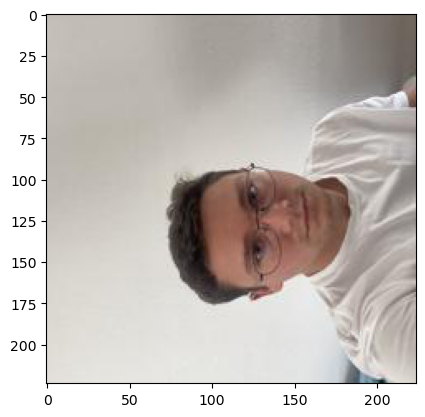

In [48]:
from keras.preprocessing import image
img = image.load_img("data/test/Dominik/image_94.jpg",target_size=(224,224)) #Dominik
#img = image.load_img("data/test/unknown/image_18.jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
saved_model = load_model("data/vgg16_1.h5")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("Dominik")
else:
    print('Unknown')

In [15]:
# Importing OpenCV package
import cv2
  
# Reading the image
img = cv2.imread('Photos/cric4.jpg')
  
# Converting image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
# Loading the required haar-cascade xml classifier file
haar_cascade = cv2.CascadeClassifier('Haarcascade_frontalface_default.xml')
  
# Applying the face detection method on the grayscale image
faces_rect = haar_cascade.detectMultiScale(gray_img, 1.1, 9)
  
# Iterating through rectangles of detected faces
for (x, y, w, h) in faces_rect:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
  
cv2.imshow('Detected faces', img)
  
cv2.waitKey(0)

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'
